# EART 70013  <a class="tocSkip">
    
# Applied Inversion Methods <a class="tocSkip">    
    
## Lecture 1 - Homework Solutions <a class="tocSkip">  

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Checking-properties-of-transposes" data-toc-modified-id="Homework---Checking-properties-of-transposes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Checking properties of transposes</a></span></li><li><span><a href="#Homework---Prove-that-$(AB)^T-=-B^T-A^T$" data-toc-modified-id="Homework---Prove-that-$(AB)^T-=-B^T-A^T$-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Prove that $(AB)^T = B^T A^T$</a></span></li><li><span><a href="#Homework---Symmetric-matrices" data-toc-modified-id="Homework---Symmetric-matrices-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Symmetric matrices</a></span></li><li><span><a href="#Homework---Matrix-vector-multiplication-as-a-weighted-sum-of-columns" data-toc-modified-id="Homework---Matrix-vector-multiplication-as-a-weighted-sum-of-columns-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Matrix-vector multiplication as a weighted sum of columns</a></span></li><li><span><a href="#Homework---Fitting-two-data-points" data-toc-modified-id="Homework---Fitting-two-data-points-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Fitting two data points</a></span></li><li><span><a href="#Homework---Squared-error-calculation-(from-Numerical-Methods)" data-toc-modified-id="Homework---Squared-error-calculation-(from-Numerical-Methods)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - Squared error calculation (from Numerical Methods)</a></span></li><li><span><a href="#Homework---Degree-of-approximation-(from-Numerical-Methods)" data-toc-modified-id="Homework---Degree-of-approximation-(from-Numerical-Methods)-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Homework - Degree of approximation (from Numerical Methods)</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import scipy.optimize as sop
from pprint import pprint

# Homework

## Homework - Checking properties of transposes

Check the four properties of the transpose operator from the lecture for some example matrices.

Hint: 

```Python
A = np.random.random((m,n))
```

is a convenient way to generate an arbitrary m by n matrix.

In [2]:
m, n = 3, 3

A = np.random.random((m, n))
B = np.random.random((m, n))
alpha = 2.

print(np.allclose((A + B).T, (A.T + B.T)))
print(np.allclose((alpha * A).T, (alpha * A.T)))
print(np.allclose((A @ B).T, (B.T @ A.T)))
print(np.allclose((A.T).T, A))


True
True
True
True


## Homework - Prove that $(AB)^T = B^T A^T$

As per the section title!

Hint: Writing in index notation $A = [a_{ij}]_{m\times n}$ and $B = [b_{ij}]_{n\times p}$
the product can be defined as: the $(i,j)$-th entry of the product $AB$ is given by
$$\sum_{k=1}^n a_{ik} b_{kj}$$
with $A$ being an $m\times p$ matrix.

## Homework - Symmetric matrices

1. Given an $n\times n$ symmetric matrix $A$ and an arbitrary $m\times n$ matrix B, show that the matrix $BAB^T$ is symmetric.

Verify through an example using NumPy.



2. If $A$ and $B$ are both symmetric square matrices, are $AB+BA$ and $AB-BA$ symmetric or skew-symmetric?

In [3]:
# Q1
n = 2
m = 3

A = np.random.random((n, n))
A = (A + A.T) / 2  # Makes A symmetric
B = np.random.random((m, n))

C = B @ A @ B.T
print(np.allclose(C, C.T))

# Q2
A = np.random.random((n, n))
A = (A + A.T) / 2  # Makes A symmetric
B = np.random.random((n, n))
B = (B + B.T) / 2  # Makes B symmetric

checks = {"AB + BA":((A @ B) + (B @ A)), "AB - BA":((A @ B) - (B @ A))}

for key, check in checks.items():
    if (np.allclose(check, check.T)):
        print(f"Output of {key} is symmetric")
    elif (np.allclose(check, -check.T)):
        print(f"Output of {key} is skew-symmetric")
    else:
        print(f"Output of {key} is not symmetric")



True
Output of AB + BA is symmetric
Output of AB - BA is skew-symmetric


## Homework - Matrix-vector multiplication as a weighted sum of columns

In the lecture we pointed out "another useful interpretation" of matrix vector multiplication.

Code up this approach and perform the same testing that we did in the lecture for `def mat_vec_product(A, x)`.

In [4]:
# Column interpretation for matrix-vector multiplication

def mat_vec_product(A, x):
    m, n = np.shape(A)
    b = np.zeros(m)
    for i in range(m):
        b[i] = A[i] @ x
    return b


# Tests from lecture

A = np.array([[2, 3], [1, -4]])
x = np.array([1, 1])

print(mat_vec_product(A,x))
print('mat_vec_product(A, x) == A@x:  ', np.allclose(mat_vec_product(A, x), A@x))
# numpy.allclose is a convenient function to check that two arrays are essentially 
# (i.e. to round off) equivalent

# Check a non-square matrix
A = np.array([[2, 3], [1, -4], [1,1]])
# based on the above weighted sum of columns, what should Ax be for the following x?
x = np.array([1, 1])

print(mat_vec_product(A,x))
print('mat_vec_product(A, x) == A@x:  ', np.allclose(mat_vec_product(A, x), A@x))





[ 5. -3.]
mat_vec_product(A, x) == A@x:   True
[ 5. -3.  2.]
mat_vec_product(A, x) == A@x:   True


## Homework - Fitting two data points

We stated in class that:


The polynomial that fits the two data points $\{(x_0,y_0),(x_1,y_1)\}$ is clearly the linear function given by

$$ y = f(x) \equiv a_0 + a_1\,x \;\;\;\;\; \text{i.e. the degree one polynomial:} \;\;\;\;\; y = P_1(x) \equiv a_0 + a_1\,x$$

where through substitution we arrive at  two simultaneous equations (or a $2\times 2$ matrix system) which can fairly easily be solved by substituting one equation into the other to conclude that

$$ a_0 = y_0 - \frac{y_1-y_0}{x_1-x_0}x_0, \;\;\;\;\;\;\;\; a_1 = \frac{y_1-y_0}{x_1-x_0}. $$

Form the set of two simultaneous equations and solve by hand to derive this solution for the coefficients.

<br> 

Confirm that this result is exactly the same as the Lagrange polynomial (we saw in the lecture) that you can just write down without needing to invert any system for coefficients.

## Homework - Squared error calculation (from Numerical Methods)

As described in the docs ([numpy.polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)), least squares fitting minimises the square of the difference between the data provided and the polynomial,

$$E = \sum_{i=0}^{N} (p(x_i) - y_i)^2,$$

where $p(x_i)$ is the value of the polynomial function that has been fit to the data evaluated at point $x_i$, and $y_i$ is the $i^{th}$ data value.

Write a Python function that evaluates the squared error, $E$, and use this function to evaluate the error for each of the polynomials calculated below. 


/var/folders/t8/g6w9mwdd78bg__5k6dqjcp_80000gn/T/ipykernel_2074/1992861006.py:31: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs=np.polyfit(xi, yi, 6)


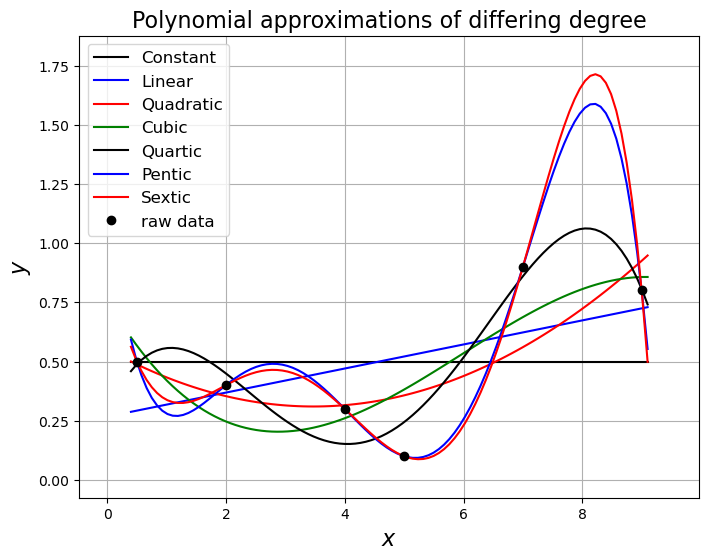

In [5]:
# create the polynomials using code from the lecture

# consider the above example data again
xi=np.array([0.5,2.0,4.0,5.0,7.0,9.0])
yi=np.array([0.5,0.4,0.3,0.1,0.9,0.8])

# Calculate coefficients of polynomial degree 0 - ie a constant value.
poly_coeffs=np.polyfit(xi, yi, 0)

# Construct a polynomial function which we can use to evaluate for arbitrary x values.
p0 = np.poly1d(poly_coeffs)

# Fit a polynomial degree 1 - ie a straight line.
poly_coeffs=np.polyfit(xi, yi, 1)
p1 = np.poly1d(poly_coeffs)

# Quadratic
poly_coeffs=np.polyfit(xi, yi, 2)
p2 = np.poly1d(poly_coeffs)

# Cubic
poly_coeffs=np.polyfit(xi, yi, 3)
p3 = np.poly1d(poly_coeffs)

poly_coeffs=np.polyfit(xi, yi, 4)
p4 = np.poly1d(poly_coeffs)

poly_coeffs=np.polyfit(xi, yi, 5)
p5 = np.poly1d(poly_coeffs)

poly_coeffs=np.polyfit(xi, yi, 6)
p6 = np.poly1d(poly_coeffs)

# and plot again
def plot_raw_data(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)
    
    
# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

x = np.linspace(0.4, 9.1, 100)

ax1.plot(x, p0(x), 'k', label='Constant')
ax1.plot(x, p1(x), 'b', label='Linear')
ax1.plot(x, p2(x), 'r', label='Quadratic')
ax1.plot(x, p3(x), 'g', label='Cubic')
ax1.plot(x, p4(x), 'k', label='Quartic')
ax1.plot(x, p5(x), 'b', label='Pentic')
ax1.plot(x, p6(x), 'r', label='Sextic')


# Overlay raw data
plot_raw_data(xi, yi, ax1)

ax1.legend(loc='best', fontsize = 12)
ax1.set_title('Polynomial approximations of differing degree', fontsize=16);

In [6]:
def sqr_error(p, xi, yi):
    E = (p(xi) - yi) ** 2
    return E.sum()

print(sqr_error(p0, xi, yi))
print(sqr_error(p1, xi, yi))
print(sqr_error(p2, xi, yi))
print(sqr_error(p3, xi, yi))

0.4600000000000001
0.33298899237933965
0.19947824214254944
0.1573034366232373


## Homework - Degree of approximation (from Numerical Methods)

Extend the previous question above by fitting and plotting polynomials of increasing degree past cubic. At what *degree* does the resulting polynomial approximation fit the data exactly?
